Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Load dataset

In [5]:
df = pd.read_csv(r"C:\Users\Thilaga\Documents\ML_SupervisedLearning\HousePrediction_LinearRegression_RandomForest\kc_house_data.csv")

Summarize dataset

In [6]:
print(df.shape)
print(df.head(5))

(21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    

In [7]:
df2 = pd.DataFrame().assign( sqft_living=df['sqft_living'], sqft_lot=df['sqft_lot'], sqft_above=df['sqft_above'],sqft_basement=df['sqft_basement'], sqft_living15=df['sqft_living15'], sqft_lot15=df['sqft_lot15'])
print(df2)

       sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0             1180      5650        1180              0           1340   
1             2570      7242        2170            400           1690   
2              770     10000         770              0           2720   
3             1960      5000        1050            910           1360   
4             1680      8080        1680              0           1800   
...            ...       ...         ...            ...            ...   
21608         1530      1131        1530              0           1530   
21609         2310      5813        2310              0           1830   
21610         1020      1350        1020              0           1020   
21611         1600      2388        1600              0           1410   
21612         1020      1076        1020              0           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4          

In [9]:
df['mean'] = df2.mean(axis=1)
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,mean
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2500.000000
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3618.500000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3720.333333
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2546.666667
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3457.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1205.000000
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,3243.833333
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1069.500000
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1380.833333


Segregate dataset into X(Input/Independent variable) & Y(output/Dependent variable)

In [10]:
X = df.iloc[:,21]
print(X)
print(X.shape)

0        2500.000000
1        3618.500000
2        3720.333333
3        2546.666667
4        3457.166667
            ...     
21608    1205.000000
21609    3243.833333
21610    1069.500000
21611    1380.833333
21612     915.500000
Name: mean, Length: 21613, dtype: float64
(21613,)


In [11]:
# Get column index from column name i.e column 3.
idx=df.columns.get_loc("price")
print("Column Index : "+ str(idx))

# Outputs
# Column Index : 2


Column Index : 2


In [12]:
Y = df.iloc[:,2]
print(Y)
print(Y.shape)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64
(21613,)


<AxesSubplot:xlabel='mean', ylabel='price'>

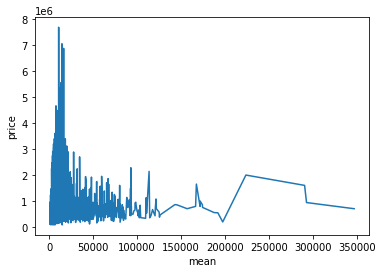

In [13]:
sns.lineplot(x="mean", y="price", data = df)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size=0.25, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [16]:
model.fit(X_train,Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[10756.      4049.5     3153.1667 ...  6129.6665 17141.5     5358.5   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.